In [1]:
import numpy as np
import matplotlib.pyplot as plt

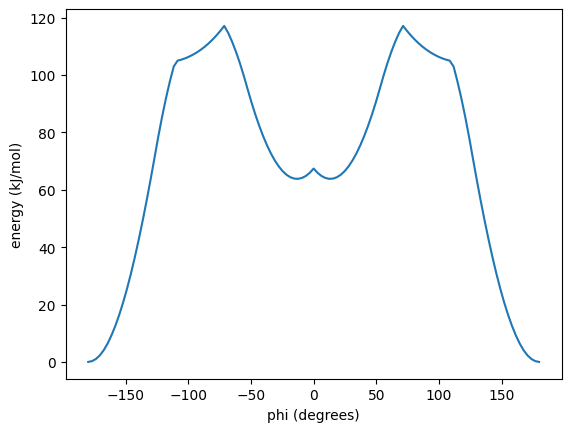

In [4]:
arr = np.fromfile("Energys", sep="\t").reshape(-1,3).T
phi, ener = arr[0], arr[1]

fig,ax = plt.subplots()
ax.set_xlabel("phi (degrees)")
ax.set_ylabel("energy (kJ/mol)")

ax.plot(phi,ener);

In [3]:
ax

<Axes: xlabel='phi (degrees)', ylabel='energy (kcal/mol)'>